In [14]:
import matplotlib.pyplot as plt
import numpy as np
import wave, sys

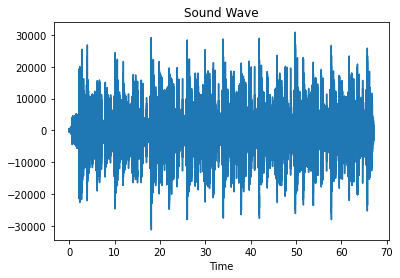

In [15]:
# shows the sound waves
def visualize(path: str):
    
    # reading the audio file
    raw = wave.open('./WAV_1MG.wav')
      
    # reads all the frames, -1 indicates all or max frames
    signal = raw.readframes(-1)
    signal = np.frombuffer(signal, dtype ="int16")
      
    # gets the frame rate
    f_rate = raw.getframerate()
  
    # to Plot the x-axis in seconds you need get the frame rate and divide by size of your signal to create a Time Vector 
    # spaced linearly with the size of the audio file
    time = np.linspace(
        0, # start
        len(signal) / f_rate,
        num = len(signal)
    )
  
    # using matlplotlib to plot / creates a new figure
    plt.figure(1)
      
    # title of the plot
    plt.title("Sound Wave")
      
    # label of x-axis
    plt.xlabel("Time")
     
    # actual ploting
    plt.plot(time, signal)
      
    # shows the plot in new window
    plt.show()
  
    # you can also save the plot using plt.savefig('filename')
  
  
if __name__ == "__main__":
    
    # gets the command line Value
    path = sys.argv[1]
  
    visualize(path)

In [ ]:
https://gist.github.com/ZWMiller/53232427efc5088007cab6feee7c6e4c

In [ ]:
https://medium.com/quick-code/graphing-real-time-audio-with-python-213be536b094

In [38]:
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftfreq
from scipy.io import wavfile

<ipython-input-39-7703134c1b22>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read("./WAV_1MG.wav")


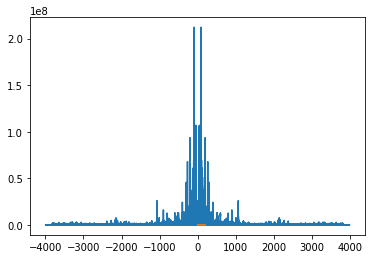

In [39]:
samplerate, data = wavfile.read("./WAV_1MG.wav")
data = data[:,0]

datafft = fft(data)
#Get the absolute value of real and complex component:
fftabs = abs(datafft)
samples = data.shape[0]
freqs = fftfreq(samples,1/samplerate)

plt.plot(freqs,fftabs)
plt.plot(data[:200])



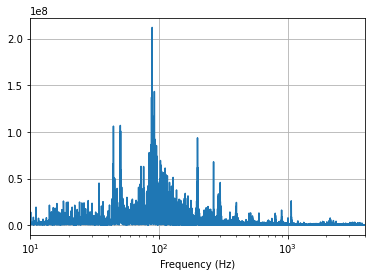

In [40]:
plt.xlim( [10, samplerate/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])


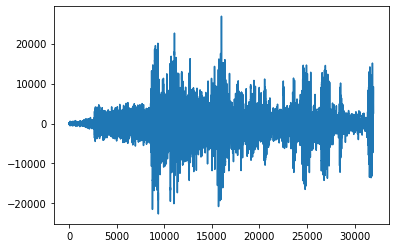

In [41]:
plt.plot(data[:4*samplerate]) #plot first 4 seconds


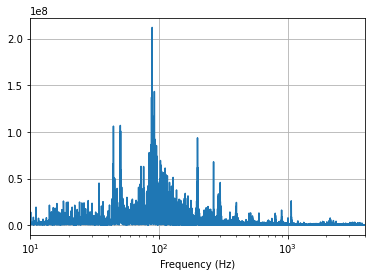

In [42]:
datafft = fft(data)
#Get the absolute value of real and complex component:
fftabs = abs(datafft)
freqs = fftfreq(samples,1/samplerate)
plt.xlim( [10, samplerate/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])

In [62]:
import numpy as np
from scipy.fft import *
from scipy.io import wavfile


def freq(file, start_time):

    
    # Open the file and convert to mono
    sr, data = wavfile.read(file)
    if data.ndim > 1:
        data = data[:, 0]
    else:
        pass

    end_time = len(file)
    
    # Return a slice of the data from start_time to end_time
    dataToRead = data[int(start_time * sr / 1000) : int(end_time * sr / 1000) + 1]

    # Fourier Transform
    N = len(dataToRead)
    yf = rfft(dataToRead)
    xf = rfftfreq(N, 1 / sr)

    # Uncomment these to see the frequency spectrum as a plot
    plt.plot(xf, np.abs(yf))
    plt.xlabel( 'Frequency (Hz)' )
    plt.ylabel('Frequency Domain (Spectrum) Magnitude')
    plt.show()

    # Get the most dominant frequency and return it
    idx = np.argmax(np.abs(yf))
    freq = xf[idx]
    return (f'Most dominant frequency: {int(freq)}')

<ipython-input-62-d17e6bfce47d>:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, data = wavfile.read(file)


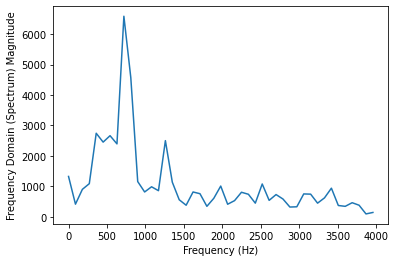

'Most dominant frequency: 719'

In [63]:
freq('WAV_1MG.wav', 0)